# Author
Name: Pushkar Niroula

Roll: 21053438

KIIT University

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install -q kaggle

In [ ]:
# from google.colab import files

# files.upload()

In [ ]:
# !mkdir ~/.kaggle/
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# !kaggle competitions download -c demand-forecasting-kernels-only

In [ ]:
# !unzip /content/demand-forecasting-kernels-only.zip -d /content/drive/MyDrive/My_Projects/Minor_Try2

In [ ]:
path_to_train = "/content/drive/MyDrive/Minor_Project_Submission/train.csv"

## Importing necessary libraries

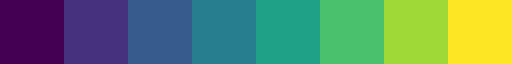

In [ ]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential, model_from_json
from keras.layers import Dense
from keras.layers import LSTM
from keras import optimizers
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")
import tensorflow as tf
tf.random.set_seed(42)
np.random.seed(42)
from matplotlib import cm
cm.get_cmap('viridis', 8)

## Reading, cleaning and preprocessing the dataset

In [ ]:
train = pd.read_csv(path_to_train)

In [ ]:
train.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [ ]:
train.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


In [ ]:
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

In [ ]:
# time period of the train and test dataset
print(train['date'].min().date())
print(train['date'].max().date())

2013-01-01
2017-12-31


2018-01-01
2018-03-31


**Lag** is the amount of day that need to be forecasted. It is calculated as follow

In [ ]:
lag_size = (test['date'].max().date() - train['date'].max().date()).days
lag_size

90

Analysis

In [ ]:
# Explore time series data
daily_sales = train.groupby('date', as_index=False)['sales'].sum()
store_daily_sales = train.groupby(['store', 'date'], as_index=False)['sales'].sum()
item_daily_sales = train.groupby(['item', 'date'], as_index=False)['sales'].sum()

In [ ]:
daily_sales.head(), store_daily_sales.head(), item_daily_sales.head()

(        date  sales
 0 2013-01-01  13696
 1 2013-01-02  13678
 2 2013-01-03  14488
 3 2013-01-04  15677
 4 2013-01-05  16237,
    store       date  sales
 0      1 2013-01-01   1316
 1      1 2013-01-02   1264
 2      1 2013-01-03   1305
 3      1 2013-01-04   1452
 4      1 2013-01-05   1499,
    item       date  sales
 0     1 2013-01-01    133
 1     1 2013-01-02     99
 2     1 2013-01-03    127
 3     1 2013-01-04    145
 4     1 2013-01-05    149)

### Daily sales

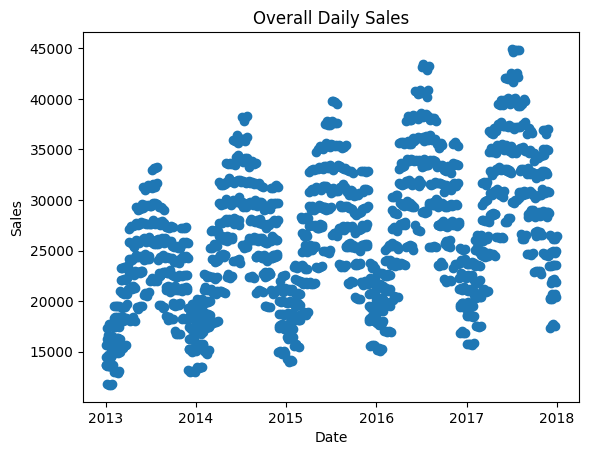

In [ ]:
plt.title("Overall Daily Sales")
plt.scatter(x=daily_sales['date'], y=daily_sales['sales'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Using Statistical Methods

#### ARIMA

In [ ]:
import plotly.express as px

In [ ]:
train = pd.read_csv(path_to_train)
train.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [ ]:
train.isna().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [ ]:
train.shape

(913000, 4)

In [ ]:
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

In [ ]:
# df.shape, df['sales'].plot()

In [ ]:
# train_gp = train.sort_values('date').groupby(['item', 'store', 'date'], as_index=False)
daily_sales = train.sort_values('date').groupby('date', as_index=False)['sales'].sum()
# train_gp = daily_sales.agg({'sales':['mean']})
# train_gp.columns = ['date', 'sales']
daily_sales.head(10)

,date,sales
0,2013-01-01,13696
1,2013-01-02,13678
2,2013-01-03,14488
3,2013-01-04,15677
4,2013-01-05,16237
5,2013-01-06,17291
6,2013-01-07,11769
7,2013-01-08,13560
8,2013-01-09,13878
9,2013-01-10,14642


In [ ]:
# df = train_gp.drop(['item', 'store'], axis=1)

In [ ]:
df = daily_sales.sort_values('date')
df.head()

,date,sales
0,2013-01-01,13696
1,2013-01-02,13678
2,2013-01-03,14488
3,2013-01-04,15677
4,2013-01-05,16237


In [ ]:
# df = df.sort_values('date')

In [ ]:
df[0:1], df[-2:-1]

(        date  sales
 0 2013-01-01  13696,
            date  sales
 1824 2017-12-30  24988)

In [ ]:
# fig = px.line(df, x='date', y='sales')
# fig.show()

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df = df.sort_values('date')
# df = df.drop(['store', 'item'],axis=1)
df.head(50)

,date,sales
0,2013-01-01,13696
1,2013-01-02,13678
2,2013-01-03,14488
3,2013-01-04,15677
4,2013-01-05,16237
5,2013-01-06,17291
6,2013-01-07,11769
7,2013-01-08,13560
8,2013-01-09,13878
9,2013-01-10,14642


In [ ]:
df1 = df.set_index('date')

In [ ]:
df1.head(5)

,sales
date,
2013-01-01,13696
2013-01-02,13678
2013-01-03,14488
2013-01-04,15677
2013-01-05,16237


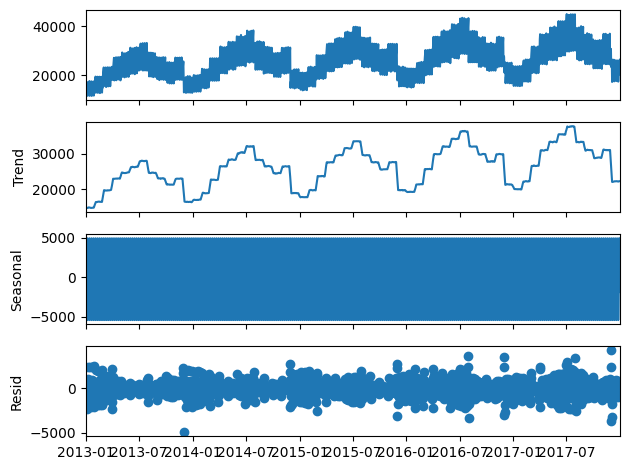

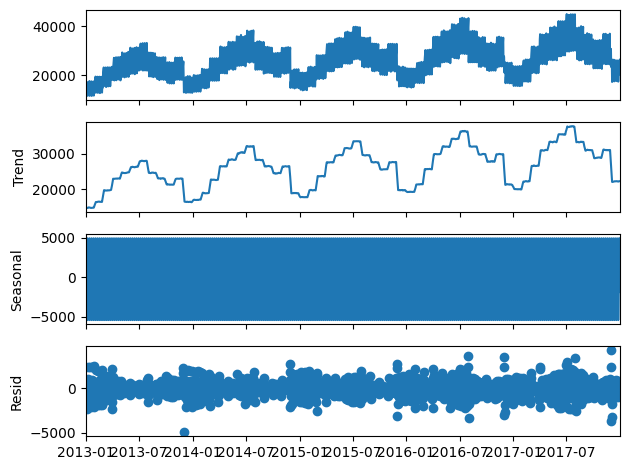

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(df1, model="additive")
decompose_data.plot()

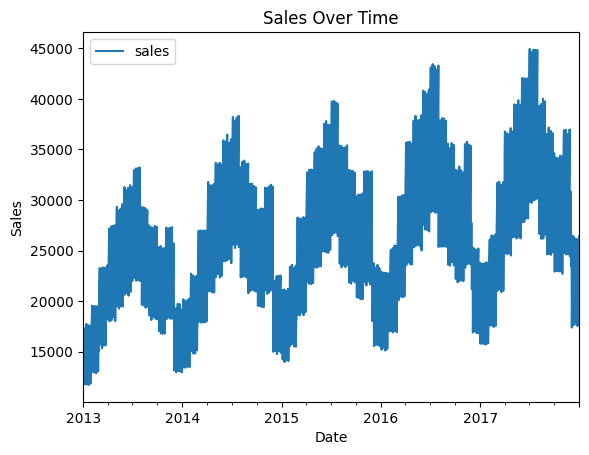

In [ ]:
# plt.figure(figsize=(15, 25))
df1.plot()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.show()

In [ ]:
df.head(50)

,date,sales
0,2013-01-01,13696
1,2013-01-02,13678
2,2013-01-03,14488
3,2013-01-04,15677
4,2013-01-05,16237
5,2013-01-06,17291
6,2013-01-07,11769
7,2013-01-08,13560
8,2013-01-09,13878
9,2013-01-10,14642


**Check if data is stationary or not**

In [ ]:
df.shape

(1826, 2)

The KPSS test is conducted with the following assumptions.

Null Hypothesis (HO): Series is trend stationary or series has no unit root.
Alternate Hypothesis(HA): Series is non-stationary, or series has a unit root.

In [ ]:
### Testing for stationarity
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adfuller_test(sales):
  result = adfuller(sales)
  labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number Of Observations Used']
  for value, label in zip(result, labels):
    print(label+' : '+str(value) )

  if result[1] <= 0.05:
    print("strong evidence against the null hypothesis (H0), reject the null hypothesis. ")
  else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")


In [ ]:
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [ ]:
adfuller_test(df['sales'])

ADF Test Statistic : -3.0602441187013483
p-value : 0.029638649268843572
#Lags Used : 21
Number Of Observations Used : 1804
strong evidence against the null hypothesis (H0), reject the null hypothesis. 


In [ ]:
df = df.set_index('date')

In [ ]:
adfuller_test(df)

ADF Test Statistic : -3.0602441187013483
p-value : 0.029638649268843572
#Lags Used : 21
Number Of Observations Used : 1804
strong evidence against the null hypothesis (H0), reject the null hypothesis. 


Data is stationary

In [ ]:
# kpss_test(df['sales'].values)

It is not stationary as ```test statistic > critical_values```. Hence we reject the null hypothesis.

**Differencing**

In [ ]:
df['Sales First Difference'] = df['sales'] - df['sales'].shift(1)

In [ ]:
df['Seasonal First Difference'] = df['sales'] - df['sales'].shift(30)

In [ ]:
df.head(123)

,sales,Sales First Difference,Seasonal First Difference
date,,,
2013-01-01,13696,NaN,NaN
2013-01-02,13678,-18.0,NaN
2013-01-03,14488,810.0,NaN
2013-01-04,15677,1189.0,NaN
2013-01-05,16237,560.0,NaN
...,...,...,...
2013-04-29,18025,-9485.0,-4267.0
2013-04-30,21299,3274.0,-2238.0
2013-05-01,22967,1668.0,4763.0


<Axes: xlabel='date'>

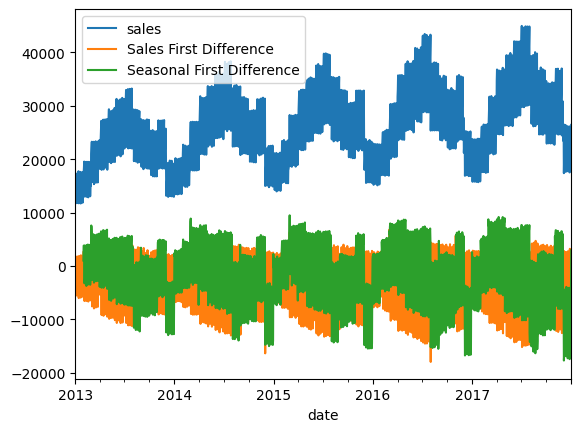

In [ ]:
df.plot()

In [ ]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -6.189712869611346
p-value : 6.165116659832576e-08
#Lags Used : 22
Number Of Observations Used : 1773
strong evidence against the null hypothesis (H0), reject the null hypothesis. 


In [ ]:
# df['Seasonal First Difference'].plot()

**Auto Regressive Model**

We use autocorrelation graphs to get the lag value

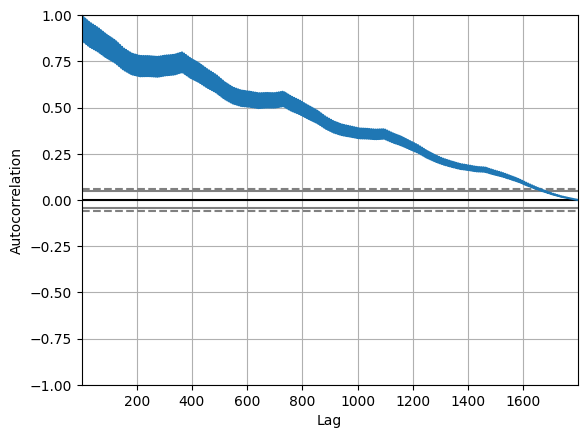

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.dropna())
plt.show()

### Final thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
  * For an AR model, the theoretical PACF "shuts off" past the order of the model. The phrase "shuts off" means that in theory the partial autocorrelations are equal to O beyond that point. Put another way, the number of nonzero partial autocorrelations gives the order of the AR model. By the "order of the model" we mean the most extreme lag of x that is used as a predictor.

* Identification of an MA model is often best done with the ACF rather than the PACE
  * For an MA model, the theoretical PACF does not shut off, but instead tapers toward O in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

  (p, q, d)

  p -> AR model lags

  d -> differencing
  
  q -> moving average lags

In [ ]:
import statsmodels.api as sm

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

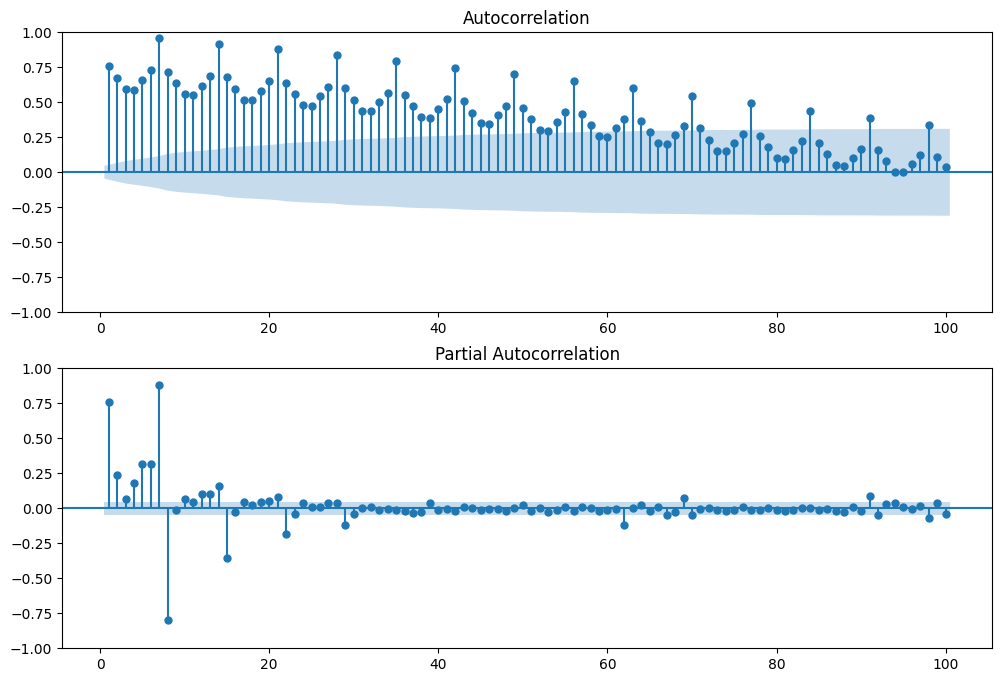

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['sales'], lags=100, ax=ax1, zero=False)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['sales'], lags=100, ax=ax2, zero=False)

* p is set to 7 from above graphs
* d is set to 1
* q is set to 0 or 1

Cycle is 6

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.1 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# stepwise_fit = auto_arima(df['sales'],  trace=True, supress_warnings=True)
stepwise_fit = auto_arima(df['sales'], seasonal=True, start_p=5, m=7, d=1, D = 1, information_criteria="bic", trace=True, error_action='ignore', n_fits=100, stepwise=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(5,1,2)(1,1,1)[7]             : AIC=inf, Time=44.92 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=30163.938, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=29714.178, Time=3.88 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=29501.505, Time=4.98 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=30157.150, Time=0.48 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=29501.024, Time=5.74 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=29713.771, Time=4.31 sec
 ARIMA(0,1,1)(2,1,1)[7]             : AIC=29499.836, Time=10.09 sec
 ARIMA(0,1,1)(2,1,0)[7]             : AIC=29571.897, Time=7.25 sec
 ARIMA(0,1,1)(2,1,2)[7]             : AIC=inf, Time=17.66 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=inf, Time=16.73 sec
 ARIMA(0,1,0)(2,1,1)[7]             : AIC=29519.715, Time=1.28 sec
 ARIMA(1,1,1)(2,1,1)[7]             : AIC=inf, Time=14.57 sec
 ARIMA(0,1,2)(2,1,1)[7]             : AIC=29501.167, Time=6.94 sec
 ARIMA(1,1,0)(2,1,1)[7]             : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1826
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 7)   Log Likelihood              -14744.918
Date:                           Thu, 11 Apr 2024   AIC                          29499.836
Time:                                   19:57:40   BIC                          29527.364
Sample:                               01-01-2013   HQIC                         29509.993
                                    - 12-31-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1120      0.018     -6.364      0.000      -0.146      -0.077
ar.S.L7       -0.1163      0.042     -2.794      0.005      -0.198      -0.035
ar.S.L14      -0.0640      0.027     -2.336      0.019      -0.118      -0.010
ma.S.L7       -0.5456      0.042    -13.117      0.000      -0.627      -0.464
sigma2      6.441e+05   5165.434    124.687      0.000    6.34e+05    6.54e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             80878.24
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.73   Skew:                            -1.80
Prob(H) (two-sided):                  0.00   Kurtosis:                        35.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

We get: Best model:  ARIMA(7, 0, 1)

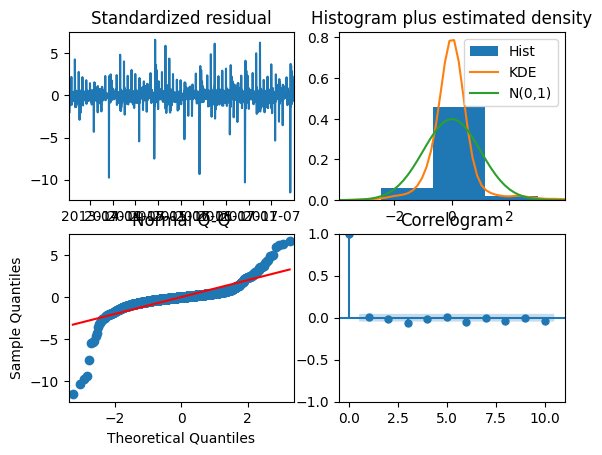

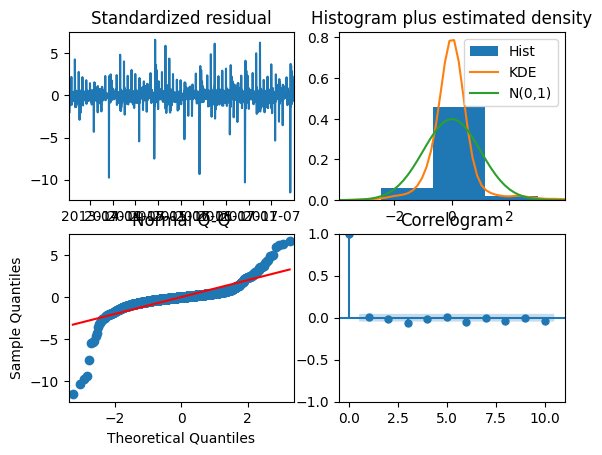

In [ ]:
stepwise_fit.plot_diagnostics()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
arima_model = ARIMA(df['sales'], order=(0, 1, 1))
history = arima_model.fit()

In [ ]:
history.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                 1826
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -17612.799
Date:                Thu, 11 Apr 2024   AIC                          35229.598
Time:                        20:01:13   BIC                          35240.616
Sample:                    01-01-2013   HQIC                         35233.662
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8651      0.010    -86.298      0.000      -0.885      -0.846
sigma2      1.412e+07    2.8e-11   5.05e+17      0.000    1.41e+07    1.41e+07
===================================================================================
Ljung-Box (L1) (Q):                  67.65   Jarque-Bera (JB):                54.06
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.60   Skew:                            -0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [ ]:
from pmdarima.model_selection import train_test_split

In [ ]:
tr, te = df[:-90], df[-90:]

In [ ]:
tr.shape

(1736, 3)

In [ ]:
te.shape

(90, 3)

In [ ]:
start = len(tr)
end = len(tr) + len(te) - 1
start, end

(1736, 1825)

In [ ]:
arima_predictions = history.predict(start=start, end=end, dynamic=True)
df['arima_forecast'] = arima_predictions

In [ ]:
arima_train_predictions = history.predict(start=0, end=start-1, dynamic=True)
df['arima_train_forecast'] = arima_train_predictions

<Axes: xlabel='date'>

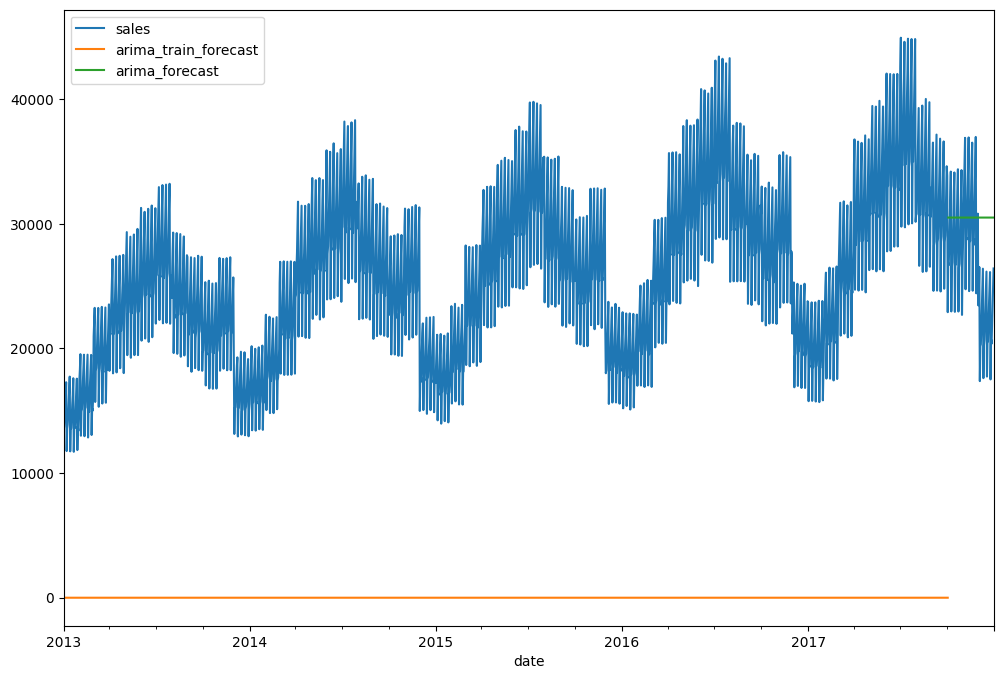

In [ ]:
df[['sales', 'arima_train_forecast', 'arima_forecast']].plot(figsize=(12, 8))

In [ ]:
print("Train rmse: ", np.sqrt(mean_squared_error(tr['sales'], arima_train_predictions)))
print("Validation rmse: ", np.sqrt(mean_squared_error(te['sales'], arima_predictions)))

Train rmse:  26856.093314196063
Validation rmse:  5905.936165801014


In [ ]:
sarimax_model = sm.tsa.statespace.SARIMAX(df['sales'], order=(0, 1, 1), seasonal_order=(2, 1, 1, 31))
results = sarimax_model.fit()

In [ ]:
train_sarimax = results.predict(start=0,end=start-1,dynamic=True)
df['sarimax_train_forecast']= train_sarimax

<Axes: xlabel='date'>

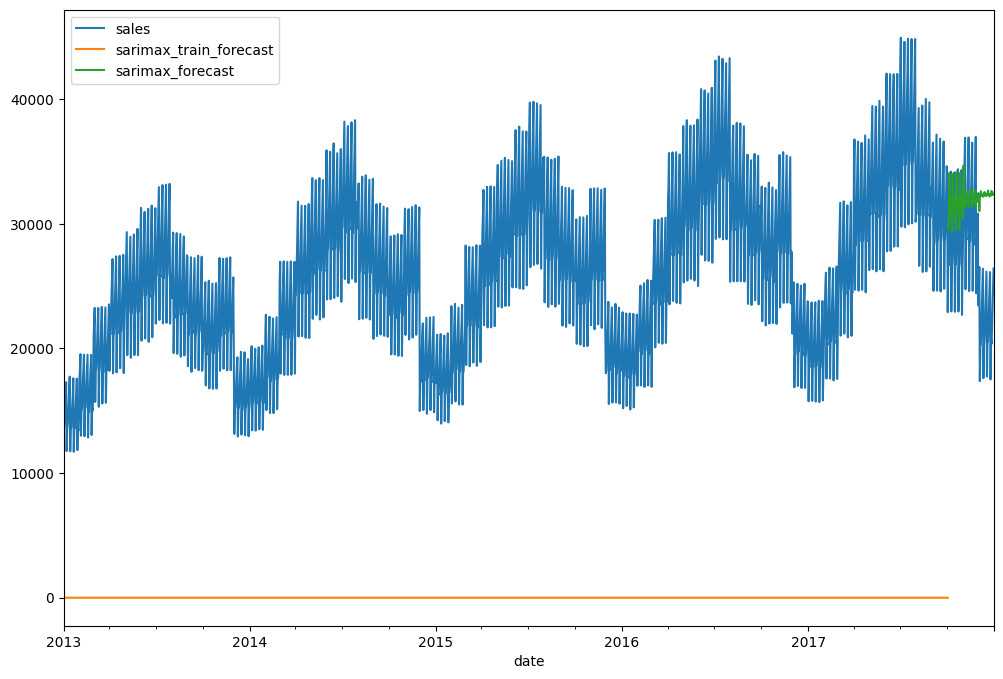

In [ ]:
sarimax_forecast = results.predict(start=start,end=end,dynamic=True)
df['sarimax_forecast']= sarimax_forecast
df[['sales', 'sarimax_train_forecast', 'sarimax_forecast']].plot(figsize=(12,8))

In [ ]:
pred = pd.DataFrame(results.predict(n_periods=31), te.index)
pred.columns = ['predicted_sales']
te['predicted_sales'] = pred

<Axes: xlabel='date'>

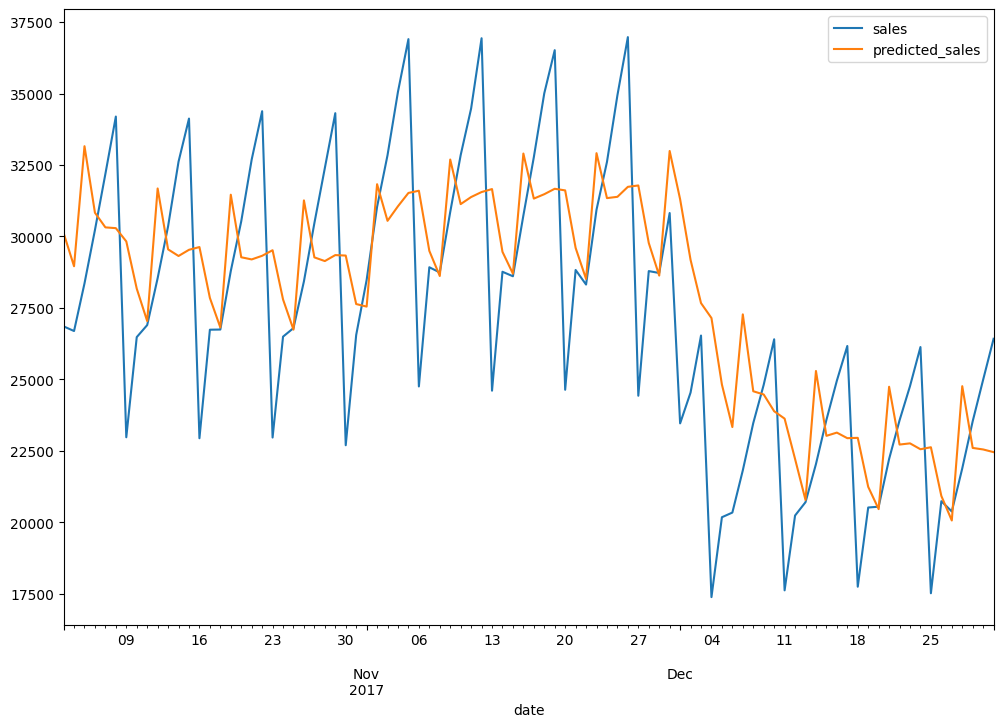

In [ ]:
te[['sales', 'predicted_sales']].plot(figsize=(12, 8))

In [ ]:
print("Train rmse: ", np.sqrt(mean_squared_error(tr['sales'], train_sarimax)))
print("Validation rmse: ", np.sqrt(mean_squared_error(te['sales'], sarimax_forecast)))

Train rmse:  26856.093314196063
Validation rmse:  6879.795771961416


### LSTM Model

**Some terminologies**

* window: The number of previous time steps to include in input sequences.
* lag: The number of future time steps to predict.

In [ ]:
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for i in range(len(sequence)):
    # find the end of this pattern
    end_ix = i + n_steps
    # check if we are beyond the sequence
    if end_ix > len(sequence)-1:
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)

In [ ]:
n_steps=90
sequence = df['sales']
# tr, te = df[:-90], df[-90:]

In [ ]:
epochs = 50
batch = 256
lr = 0.001
adam = optimizers.Adam(lr)

In [ ]:
X, y = split_sequence(sequence, n_steps)

In [ ]:
x_train, y_train, x_test, y_test = X[:-90], y[:-90], X[-90:], y[-90:]

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1646, 90, 1), (1646,), (90, 90, 1), (90,))

In [ ]:
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(x_train.shape[1], 1)))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mse', optimizer=adam)
model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                10400     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_lstm.fit(x_train, y_train, epochs=epochs, batch_size=1, verbose=2)

Epoch 1/50
1646/1646 - 35s - loss: 1215479424.0000 - 35s/epoch - 21ms/step
Epoch 2/50
1646/1646 - 29s - loss: 2452696576.0000 - 29s/epoch - 18ms/step
Epoch 3/50
1646/1646 - 29s - loss: 910430272.0000 - 29s/epoch - 17ms/step
Epoch 4/50
1646/1646 - 29s - loss: 1104596992.0000 - 29s/epoch - 18ms/step
Epoch 5/50
1646/1646 - 29s - loss: 514429184.0000 - 29s/epoch - 18ms/step
Epoch 6/50
1646/1646 - 30s - loss: 45256096.0000 - 30s/epoch - 18ms/step
Epoch 7/50
1646/1646 - 29s - loss: 26221422.0000 - 29s/epoch - 18ms/step
Epoch 8/50
1646/1646 - 36s - loss: 22138806.0000 - 36s/epoch - 22ms/step
Epoch 9/50
1646/1646 - 31s - loss: 36122896.0000 - 31s/epoch - 19ms/step
Epoch 10/50
1646/1646 - 30s - loss: 21206386.0000 - 30s/epoch - 18ms/step
Epoch 11/50
1646/1646 - 34s - loss: 19217464.0000 - 34s/epoch - 21ms/step
Epoch 12/50
1646/1646 - 29s - loss: 18648784.0000 - 29s/epoch - 18ms/step
Epoch 13/50
1646/1646 - 29s - loss: 186259968.0000 - 29s/epoch - 18ms/step
Epoch 14/50
1646/1646 - 29s - loss: 82

In [ ]:
lstm_train_predict = model_lstm.predict(x_train)
lstm_test_predict = model_lstm.predict(x_test)

3/3 [==============================] - 0s 18ms/step


In [ ]:
print("Train rmse: ", np.sqrt(mean_squared_error(y_train, lstm_train_predict)))
print("Validation rmse: ", np.sqrt(mean_squared_error(y_test, lstm_test_predict)))

Train rmse:  3364.962196205828
Validation rmse:  4019.081118978081


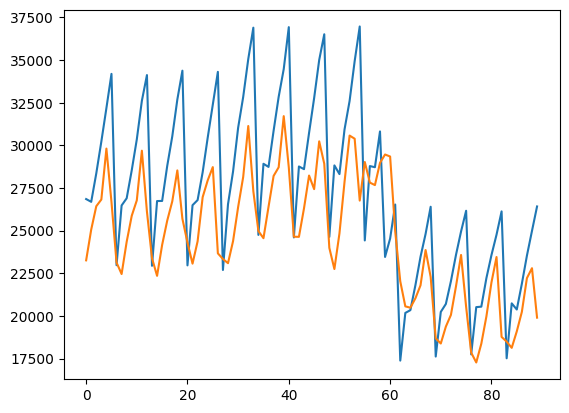

In [ ]:
plt.plot(y_test)
plt.plot(lstm_test_predict)
plt.title()

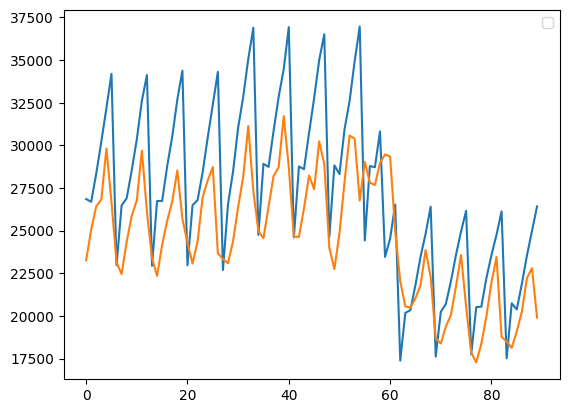

In [ ]:
plt.plot(y_test)
plt.plot(lstm_test_predict)
plt.legend()